In [2]:
import turicreate as tc

In [4]:
train_image = tc.SFrame('image_train_data/')
test_image = tc.SFrame('image_test_data/')

In [6]:
knn_model=tc.nearest_neighbors.create(train_image , features=['deep_features'],label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [7]:
cat = train_image[18:19]

,SArray
0,

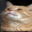

In [9]:
cat['image'].explore()

In [10]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 13.932ms     |

| Done         |         | 100         | 120.337ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [13]:
def get_images_from_ids(query_result):
    return train_image.filter_by(query_result['reference_label'],'id')

In [15]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 6.433ms      |

| Done         |         | 100         | 2.34s        |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

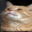
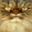
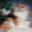
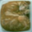
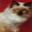

In [17]:
cat_neighbors['image'].explore()

In [20]:
car = train_image[8:9]

,SArray
0,

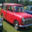

In [21]:
car['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 11.201ms     |

| Done         |         | 100         | 125.205ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

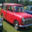
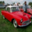
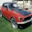
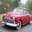
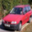

In [23]:
get_images_from_ids(knn_model.query(car))['image'].explore()

In [30]:
get_neighbors = lambda i: get_images_from_ids(knn_model.query(train_image[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 4.929ms      |

| Done         |         | 100         | 86.641ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

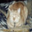
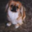
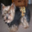
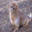
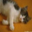

In [32]:
get_neighbors(1)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 6.864ms      |

| Done         |         | 100         | 109.489ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

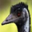
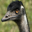
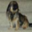
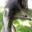
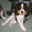

In [33]:
get_neighbors(500)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 7.074ms      |

| Done         |         | 100         | 138.265ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

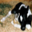
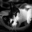
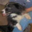
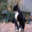
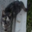

In [34]:
get_neighbors(25)

In [36]:
sketch = tc.Sketch(train_image['label'])

In [37]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [39]:
train_image.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [40]:
dog_data = train_image[train_image['label'] == 'dog']
cat_data = train_image[train_image['label'] == 'cat']
auto_data = train_image[train_image['label'] == 'automobile']
bird_data = train_image[train_image['label'] == 'bird']

In [41]:
dog_model = tc.nearest_neighbors.create(dog_data, features=['deep_features'], label='id')

cat_model = tc.nearest_neighbors.create(cat_data,features=['deep_features'],label='id')

auto_model = tc.nearest_neighbors.create(auto_data,features=['deep_features'],label='id')

bird_model = tc.nearest_neighbors.create(bird_data,features=['deep_features'],label='id')


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.086ms      |

| Done         |         | 100         | 104.353ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

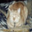
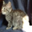
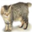
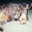
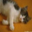

In [52]:
get_images_from_ids(cat_model.query(cat_data[0:1]))['image'].explore()

,SArray
0,

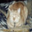

In [51]:
cat_data[0:1]['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 4.889ms      |

| Done         |         | 100         | 33.352ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

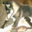
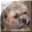
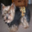
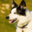
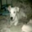

In [53]:
get_images_from_ids(dog_model.query(test_image[0:1]))['image'].explore()

In [56]:
query_image = test_image[0:1]
neighbors = cat_model.query(query_image, label='id', k=5)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 5.523ms      |

| Done         |         | 100         | 27.987ms     |

+--------------+---------+-------------+--------------+

In [57]:
distances = neighbors['distance']
mean_distance = distances.mean()

In [58]:
mean_distance

36.15573070978294

In [59]:
query_image = test_image[0:1]
neighbors = dog_model.query(query_image, label='id', k=5)
distances = neighbors['distance']
mean_distance = distances.mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.28ms       |

| Done         |         | 100         | 30.399ms     |

+--------------+---------+-------------+--------------+

In [60]:
mean_distance

37.77071136184157

In [63]:
query_image = test_image[0:1]

cat_neighbors = cat_model.query(query_image, k=5)
mean_cat_dist = cat_neighbors['distance'].mean()

dog_neighbors = dog_model.query(query_image, k=5)
mean_dog_dist = dog_neighbors['distance'].mean()

print("mean of cat", mean_cat_dist)
print("mean of dog:", mean_dog_dist)

if mean_cat_dist < mean_dog_dist:
    print("cat")
else:
    print("dog")

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.433ms      |

| Done         |         | 100         | 26.713ms     |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.331ms      |

| Done         |         | 100         | 33.577ms     |

+--------------+---------+-------------+--------------+

mean of cat 36.15573070978294
mean of dog: 37.77071136184157
cat


In [65]:
dog_test = test_image[test_image['label'] == 'dog']
neighbors = dog_model.query(dog_test, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 407.293ms    |

| Done         | 509000  | 100         | 443.159ms    |

+--------------+---------+-------------+--------------+

In [68]:
neighbors = knn_model.query(test_image, k=1)
print(neighbors.column_names())

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 4000         | 1000000 | 12.4688     | 2.80s        |

| Done         | 8020000 | 100         | 2.92s        |

+--------------+---------+-------------+--------------+

['query_label', 'reference_label', 'distance', 'rank']


In [76]:
# دمج التصنيفات من بيانات الاختبار حسب query_label (id)
test_labels = test_image[['id', 'label']]

# دمج التصنيفات من بيانات التدريب حسب reference_label (id)
train_labels = train_image[['id', 'label']]

# إعادة تسمية الأعمدة لتجنب الالتباس
test_labels = test_labels.rename({'id': 'query_label', 'label': 'query_class'})
train_labels = train_labels.rename({'id': 'reference_label', 'label': 'reference_class'})

# دمج labels مع نتائج neighbors حسب query_label و reference_label
results = neighbors.join(test_labels, on='query_label')
results = results.join(train_labels, on='reference_label')

# الآن فلتر الصور التي تصنيفها الحقيقي 'dog' (في الاختبار)
dog_results = results[results['query_class'] == 'dog']

# حساب عدد الحالات التي تم تصنيفها بشكل صحيح
correct = (dog_results['query_class'] == dog_results['reference_class']).sum()
total = len(dog_results)
accuracy = correct / total if total > 0 else 0

print(f"Accuracy for dog images: {accuracy * 100:.2f}%")


Accuracy for dog images: 68.60%
